<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/2.2_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Probability Distribution

A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment. We will discuss both discrete and continuous probability distributions.

### 2.2.1 Probability Axioms

#### 2.2.1.1: Sample Spaces and Events

This section introduces key concepts in probability: sample spaces, events, and probability distributions.

---

**Definition (Sample Space):**

The sample space, denoted by $S$, is the set of all possible outcomes of an experiment.

Examples:
- Tossing a coin: $S = \{H, T\}$
- Rolling a die: $S = \{1, 2, 3, 4, 5, 6\}$

---

**Definition (Event):**

An event is a subset of the sample space $S$.

- Simple Event: Contains exactly one outcome.
- Compound Event: Contains more than one outcome.

---

**Definition (Probability Distribution):**

A probability distribution assigns a number $P(A)$ to each event $A$, representing the likelihood that $A$ will occur. It follows these basic rules:

1. $0 \leq P(A) \leq 1$
2. $P(S) = 1$
3. For disjoint events $A_1, A_2, \dots$:
   $$
   P(A_1 \cup A_2 \cup \dots) = \sum P(A_i)
   $$

---

**Definition (Complementary Events):**

For any event $A$, the complement $A'$ (where $A$ does not occur) satisfies:
$$ P(A) + P(A') = 1 $$

---

**Definition (Mutually Exclusive Events):**

If events $A$ and $B$ cannot both occur, they are mutually exclusive:
$$ P(A \cup B) = P(A) + P(B) $$

---

**Definition (General Addition Rule):**

For any events $A$ and $B$:
$$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $$

---

**Example:**

If an experiment has $N$ equally likely outcomes and event $A$ has $N(A)$ outcomes:
$$ P(A) = \frac{N(A)}{N} $$


In [10]:
import numpy as np
import pandas as pd

np.random.seed(42)
data = {
    'G3': np.random.randint(0, 20, 1000),  # final grades (out of 20)
    'absences': np.random.randint(0, 15, 1000)  # absences
}

df = pd.DataFrame(data)
df['grade_A'] = np.where(df['G3']*5 >= 80, 1, 0)  # Grades A
df['high_absenses'] = np.where(df['absences'] >= 10, 1, 0)  # High absences
df['count'] = 1

pivot_table = pd.pivot_table(
    df,
    values='count',
    index=['grade_A'],
    columns=['high_absenses'],
    aggfunc=np.size,
    fill_value=0
)

print("\nPivot Table of Grades and Absences:\n")
print(f"{'':<10}{'Low Absences':<15}{'High Absences':<15}")
print(f"{'No A':<10}{pivot_table[0][0]:<15}{pivot_table[1][0]:<15}")
print(f"{'Got A':<10}{pivot_table[0][1]:<15}{pivot_table[1][1]:<15}\n")

P_A = (pivot_table[1][1] + pivot_table[1][0]) / df.shape[0]
P_B = (pivot_table[1][1] + pivot_table[0][1]) / df.shape[0]
P_AB = pivot_table[1][1] / df.shape[0]

P_A_given_B = P_AB / P_B

print(f"P(A|B): {P_A_given_B:.4f}")



Pivot Table of Grades and Absences:

          Low Absences   High Absences  
No A      523            284            
Got A     134            59             

P(A|B): 0.3057


### 2.2.2 Conditional Probability

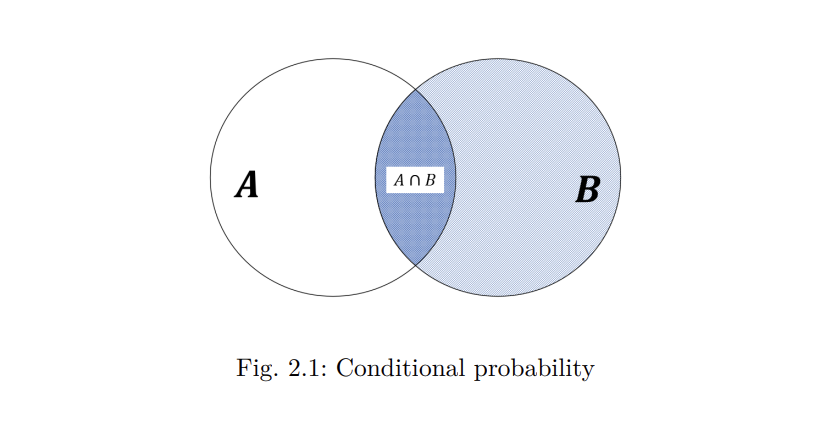

This section discusses conditional probability, which measures the probability of an event occurring given that another event has already occurred.

---

**Definition (Conditional Probability):**

For any two events $A$ and $B$ with $P(B) > 0$, the conditional probability of $A$ given $B$ is defined as:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

This represents the probability of $A$ occurring, assuming that $B$ has occurred.

---

**Definition (Multiplication Rule):**

The conditional probability leads to the multiplication rule, which helps calculate the probability of the intersection of two events:

$$
P(A \cap B) = P(A | B) \cdot P(B)
$$

This rule is useful when $P(A \cap B)$ is unknown, but both $P(A | B)$ and $P(B)$ are known.

---

**Definition (Independent Events):**

Two events $A$ and $B$ are independent if the occurrence of one does not affect the probability of the other. Mathematically, this is expressed as:

$$
P(A | B) = P(A)
$$

Or equivalently:

$$
P(A \cap B) = P(A) \cdot P(B)
$$

If this condition is not satisfied, the events are considered dependent.

---

**Definition (Mutual Independence):**

Events $A_1, A_2, \dots, A_n$ are mutually independent if, for every subset of indices $i_1, i_2, \dots, i_k$, the following holds:

$$
P(A_{i_1} \cap A_{i_2} \cap \dots \cap A_{i_k}) = P(A_{i_1}) \cdot P(A_{i_2}) \cdot \dots \cdot P(A_{i_k})
$$

In [3]:
# Probability of event A (high grade)
P_A = (pivot_table[1][1] + pivot_table[1][0]) / df.shape[0]

# Probability of event B (high absences)
P_B = (pivot_table[1][1] + pivot_table[0][1]) / df.shape[0]

# Probability of both events A and B (high grade and high absences)
P_AB = pivot_table[1][1] / df.shape[0]

# Conditional probability P(A|B)
P_A_given_B = P_AB / P_B
print(f"P(A|B): {P_A_given_B}")


P(A|B): 0.30569948186528495


### 2.2.3 Discrete Random Variables

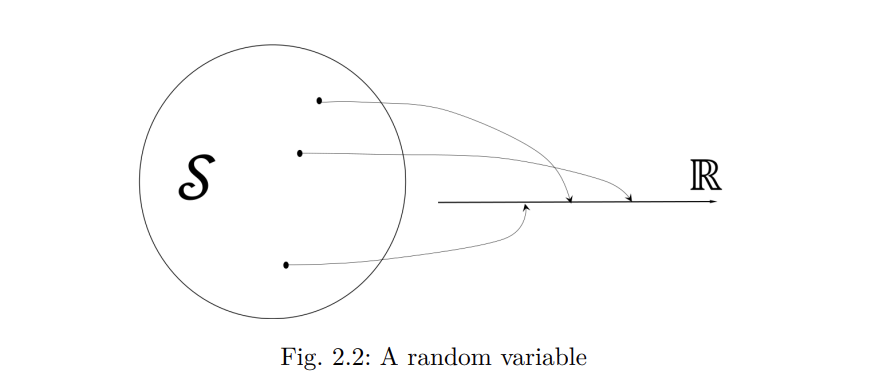


This section introduces the concept of random variables, focusing on discrete random variables, and discusses their probability distributions.

---

**Definition (Random Variable):**

A random variable is a function that assigns a real number to each outcome in a sample space $S$ of some experiment.

---

**Definition (Discrete Random Variable):**

A discrete random variable is a random variable whose possible values either form a finite set or can be listed in an infinite sequence. The random variable is called continuous if its possible values form an interval on the number line.

---

**Definition (Probability Mass Function - pmf):**

The probability mass function (pmf) of a discrete random variable is defined for each possible value $x$ as:

$$
p(x) = P(X = x)
$$

Where $p(x)$ represents the probability that the discrete random variable $X$ takes the value $x$.

---

**Definition (Cumulative Distribution Function - cdf):**

The cumulative distribution function (cdf) $F(x)$ of a discrete random variable $X$ is defined as the probability that $X$ takes on a value less than or equal to $x$:

$$
F(x) = P(X \leq x) = \sum_{y \leq x} p(y)
$$

---

**Example (Bernoulli and Binomial Distributions):**

- A **Bernoulli random variable** is one whose possible values are $0$ and $1$ (success/failure).
- A **binomial random variable** $X$ associated with $n$ independent Bernoulli trials with success probability $p$ is defined as the number of successes among $n$ trials.

The probability mass function of a binomial random variable $X$ is:

$$
b(x; n, p) = \binom{n}{x} p^x (1 - p)^{n - x}, \quad x = 0, 1, 2, \dots, n
$$

---

**Example (Poisson Distribution):**

The Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space. A random variable $X$ is said to have a Poisson distribution with parameter $\mu$ if the pmf of $X$ is:

$$
p(x; \mu) = \frac{e^{-\mu} \mu^x}{x!}, \quad x = 0, 1, 2, \dots
$$

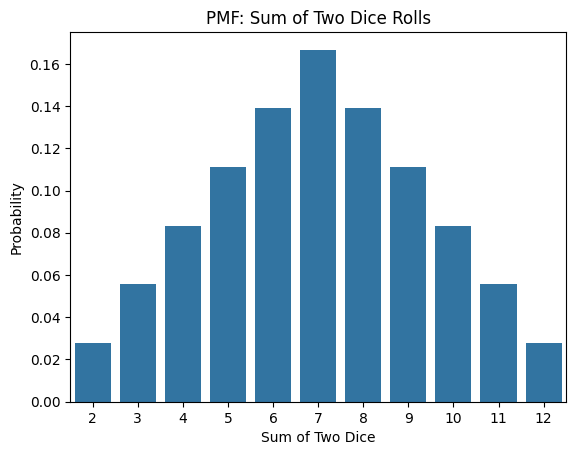

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product

# Dice outcomes (each die has 6 faces)
dice = range(1, 7)

# Compute the outcomes of rolling two dice
outcomes = list(product(dice, repeat=2))

# Calculate the sum of the two dice
sums = [sum(outcome) for outcome in outcomes]

# Calculate the frequency of each possible sum (from 2 to 12)
frequencies = {value: sums.count(value) for value in range(2, 13)}

# Total number of outcomes (36 in case of 2 dice)
total_outcomes = len(sums)

probabilities = pd.DataFrame(
    data=[[value, frequency / total_outcomes] for value, frequency in frequencies.items()],
    columns=['Sum of Two Dice', 'Probability']
)

sns.barplot(x='Sum of Two Dice', y='Probability', data=probabilities)
plt.title("PMF: Sum of Two Dice Rolls")
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.show()


#### 2.2.3.1 The Expected Value and Variance of ***X***

The expected value and variance are key measures for discrete random variables. The expected value represents the average outcome, while the variance measures the spread of possible values around the expected value.

---

**Definition (Expected Value):**

The expected value (or mean) of a discrete random variable $X$, denoted by $E(X)$ or $\mu_X$, is defined as:

$$
E(X) = \mu_X = \sum_{x \in D} x \cdot p(x)
$$

Where $D$ represents the set of possible values of $X$, and $p(x)$ is the probability mass function.

---

**Example:**

Let $X$ be a Bernoulli random variable with pmf $p(1) = p$ and $p(0) = 1 - p$. The expected value of $X$ is:

$$
E(X) = 0 \cdot (1 - p) + 1 \cdot p = p
$$

Thus, the expected value of $X$ is just the probability of success $p$.

---

**Definition (Expected Value of a Function $h(X)$):**

If $X$ is a discrete random variable with pmf $p(x)$, then the expected value of a function $h(X)$ is:

$$
E[h(X)] = \sum_{x \in D} h(x) \cdot p(x)
$$

In particular:

$$
E(aX + b) = a \cdot E(X) + b
$$

---

**Definition (Variance):**

The variance of a discrete random variable $X$, denoted by $V(X)$ or $\sigma_X^2$, is a measure of how much the values of $X$ differ from the mean $\mu$. It is defined as:

$$
V(X) = E\left[(X - \mu)^2\right] = \sum_{x \in D} (x - \mu)^2 \cdot p(x)
$$

The **standard deviation** of $X$ is the square root of the variance:

$$
\sigma_X = \sqrt{V(X)}
$$

---

**Important Results:**

- If $X$ is a binomial random variable with parameters $n$ and $p$, then:

  $$
  E(X) = np, \quad V(X) = np(1 - p)
  $$

- If $X$ is a Poisson random variable with parameter $\mu$, then:

  $$
  E(X) = \mu, \quad V(X) = \mu
  $$

---

**Proposition:**

For any constants $a$ and $b$, the variance of $aX + b$ is given by:

$$
V(aX + b) = \sigma^2_{aX+b} = a^2 \cdot \sigma^2_X
$$

The standard deviation is:

$$
\sigma_{aX + b} = |a| \cdot \sigma_X
$$

In particular:

$$
\sigma_{aX} = |a| \cdot \sigma_X, \quad \sigma_{X + b} = \sigma_X
$$

---

**Proposition:**

- If $X$ is a binomial random variable with parameters $n$ and $p$, then:

  $$
  E(X) = np, \quad V(X) = np(1 - p), \quad \sigma_X = \sqrt{np(1 - p)}
  $$

- If $X$ is a Poisson random variable with parameter $\mu$, then:

  $$
  E(X) = \mu, \quad V(X) = \mu
  $$

In [5]:
from numpy import mean, var

v = np.array([1, 2, 3, 4, 5, 6])

expected_value = mean(v)
print(f"Expected Value: {expected_value}")

variance_value = var(v, ddof=1)
print(f"Variance: {variance_value}")


Expected Value: 3.5
Variance: 3.5


### 2.2.4 Continues Random Variables

A random variable $X$ is continuous if its set of possible values consists of an interval or a union of disjoint intervals on the number line. Unlike discrete random variables, a continuous random variable can take any value within a certain range.

---

**Definition (Probability Density Function - pdf):**

The probability distribution (or probability density function, pdf) of a continuous random variable $X$ is a function $f(x)$ such that, for any two numbers $a$ and $b$ with $a \leq b$:

$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx
$$

This means that the probability that $X$ takes on a value in the interval $[a, b]$ is the area under the density curve over this interval.

The function $f(x)$ must satisfy the following conditions:
1. $f(x) \geq 0$ for all $x$
2. The total area under the entire graph of $f(x)$ must equal 1:
   $$
   \int_{-\infty}^{\infty} f(x) \, dx = 1
   $$

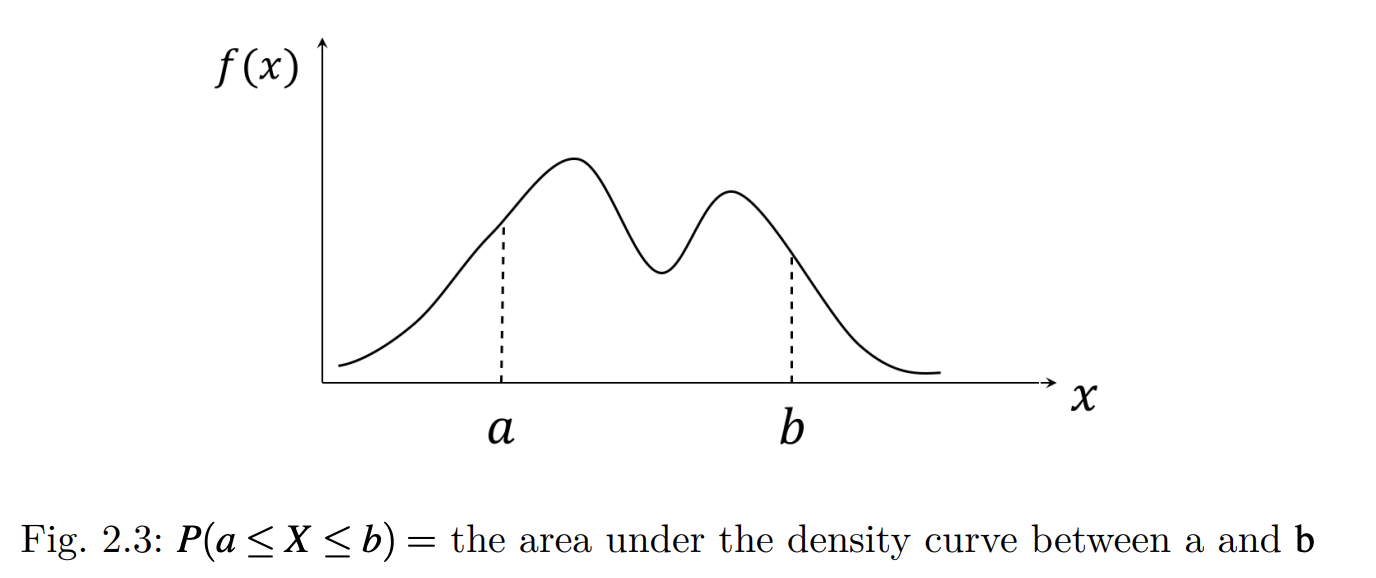

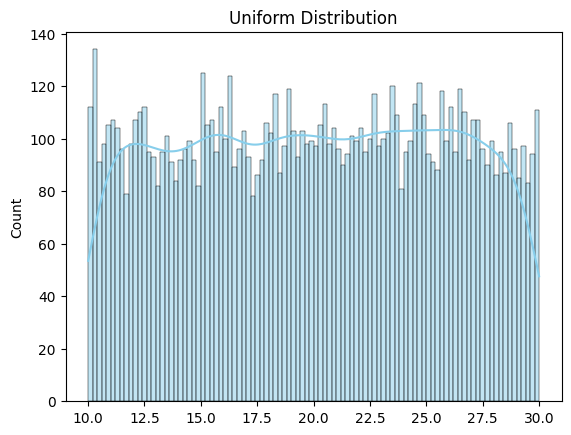

In [6]:
from scipy.stats import uniform
import seaborn as sns

data_uniform = uniform.rvs(size=10000, loc=10, scale=20)

sns.histplot(data_uniform, bins=100, kde=True, color='skyblue')
plt.title("Uniform Distribution")
plt.show()


#### 2.2.4.1 Expected Values and Variances

The expected value and variance for continuous random variables are defined similarly to discrete random variables, but they involve integration instead of summation.

---

**Definition (Expected Value):**

The expected (or mean) value of a continuous random variable $X$ with pdf $f(x)$ is:

$$
E(X) = \mu_X = \int_{-\infty}^{\infty} x \cdot f(x) \, dx
$$

---

**Definition (Variance):**

The variance of a continuous random variable $X$ with pdf $f(x)$ and expected value $\mu$ is:

$$
\sigma^2_X = V(X) = \int_{-\infty}^{\infty} (x - \mu)^2 \cdot f(x) \, dx = E[(X - \mu)^2]
$$

The standard deviation $\sigma_X$ is the square root of the variance:

$$
\sigma_X = \sqrt{V(X)}
$$

---

**Proposition:**

The expected value and variance of continuous random variables have the following properties:

1. If $X$ is a continuous random variable with pdf $f(x)$ and $h(X)$ is any function of $X$, then:

   $$
   E[h(X)] = \int_{-\infty}^{\infty} h(x) \cdot f(x) \, dx
   $$

2. Variance can also be computed using:

   $$
   V(X) = E[X^2] - [E(X)]^2
   $$


In [7]:
from scipy.stats import norm
import numpy as np

mu, sigma = 0, 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

pdf = norm.pdf(x, mu, sigma)

# Expected value using integration
expected_value = np.sum(x * pdf) / np.sum(pdf)
variance = np.sum((x - expected_value)**2 * pdf) / np.sum(pdf)

print(f"Expected Value: {expected_value}")
print(f"Variance: {variance}")


Expected Value: -5.690386295293085e-17
Variance: 0.9989452938341041


#### 2.2.4.2 The Normal Distribution

The normal distribution is one of the most widely used continuous probability distributions. It is characterized by its bell-shaped curve, and many natural phenomena follow this distribution.

---

**Definition (Normal Distribution):**

A continuous random variable $X$ is said to have a **normal distribution** with parameters $\mu$ (mean) and $\sigma$ (standard deviation), denoted as $X \sim N(\mu, \sigma^2)$, if its pdf is:

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}, \quad -\infty < x < \infty
$$

The normal distribution is symmetric about the mean $\mu$, and the spread is determined by the standard deviation $\sigma$.

---

**Definition (Standard Normal Distribution):**

The **standard normal distribution** is a special case of the normal distribution with $\mu = 0$ and $\sigma = 1$. A random variable $Z$ with a standard normal distribution is denoted as $Z \sim N(0, 1)$, and its pdf is:

$$
f(z; 0, 1) = \frac{1}{\sqrt{2 \pi}} \, e^{-\frac{z^2}{2}}, \quad -\infty < z < \infty
$$

The cumulative distribution function (cdf) of the standard normal distribution is denoted as $\Phi(z)$ and gives the probability that $Z$ is less than or equal to $z$:

$$
\Phi(z) = P(Z \leq z) = \int_{-\infty}^{z} f(y; 0, 1) \, dy
$$

---

**Proposition:**

If $X$ is a normal random variable with mean $\mu$ and standard deviation $\sigma$, then the standardized variable:

$$
Z = \frac{X - \mu}{\sigma}
$$

follows a standard normal distribution, i.e., $Z \sim N(0, 1)$. The probability of $X$ lying between $a$ and $b$ is:

$$
P(a \leq X \leq b) = P\left( \frac{a - \mu}{\sigma} \leq Z \leq \frac{b - \mu}{\sigma} \right) = \Phi\left( \frac{b - \mu}{\sigma} \right) - \Phi\left( \frac{a - \mu}{\sigma} \right)
$$

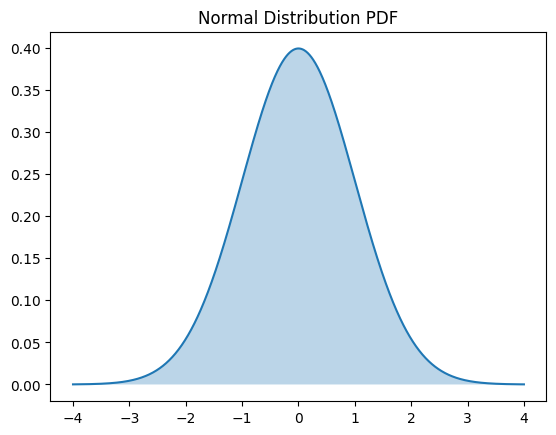

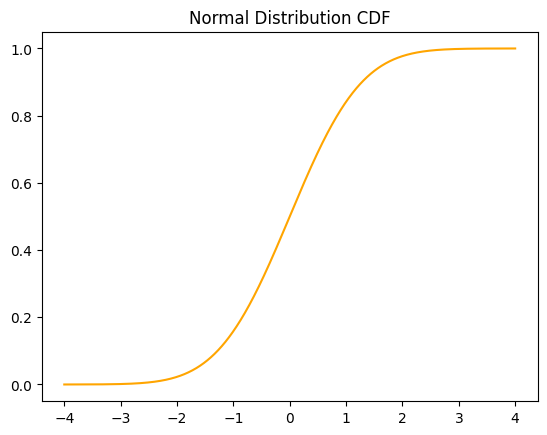

In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0, 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

plt.plot(x, norm.pdf(x, mu, sigma), label='PDF')
plt.fill_between(x, norm.pdf(x, mu, sigma), alpha=0.3)
plt.title("Normal Distribution PDF")
plt.show()

plt.plot(x, norm.cdf(x, mu, sigma), label='CDF', color='orange')
plt.title("Normal Distribution CDF")
plt.show()
